# **Importing libraries & Reading Data**


## Importing libraries

In [558]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from statistics import mean, stdev

import warnings
warnings.filterwarnings("error", message=".*check_inverse*.", category=UserWarning, append=False)

my_palette = sns.color_palette(["#C62828","#1565C0","#8A897C","#59D2FE","#D7B49E"])
sns.set_palette(my_palette)

## Read the data

In [559]:
df = pd.read_csv("Heart_Disease.csv")

# **Data Preprocessing**


In [560]:
# look at the first 5 rows of the data
df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,2,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,3,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,4,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,5,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No


In [561]:
# check the shape of the data set
df.shape

(270, 17)

In [562]:
# check the data type of each column
df.dtypes

id                           int64
Age                        float64
Gender                      object
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
work_type                   object
smoking_status              object
Heart Disease               object
dtype: object

In [563]:
#check the number of nulls in each column and the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      264 non-null    float64
 2   Gender                   264 non-null    object 
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [564]:
df.isnull().sum()

id                         0
Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64

In [565]:
# calculate the percentage of null values in columns
df.isna().mean() * 100

id                         0.000000
Age                        2.222222
Gender                     2.222222
Chest pain type            0.000000
BP                         0.000000
Cholesterol                0.000000
FBS over 120               0.000000
EKG results                0.000000
Max HR                     0.000000
Exercise angina            0.000000
ST depression              0.000000
Slope of ST                0.000000
Number of vessels fluro    0.000000
Thallium                   0.000000
work_type                  3.333333
smoking_status             2.222222
Heart Disease              0.000000
dtype: float64

In [566]:
data_loss = 100-(df.dropna().shape[0]/df.shape[0]*100)
print(round(data_loss, 1) ," % of lost data if we drop nulls.")

9.6  % of lost data if we drop nulls.


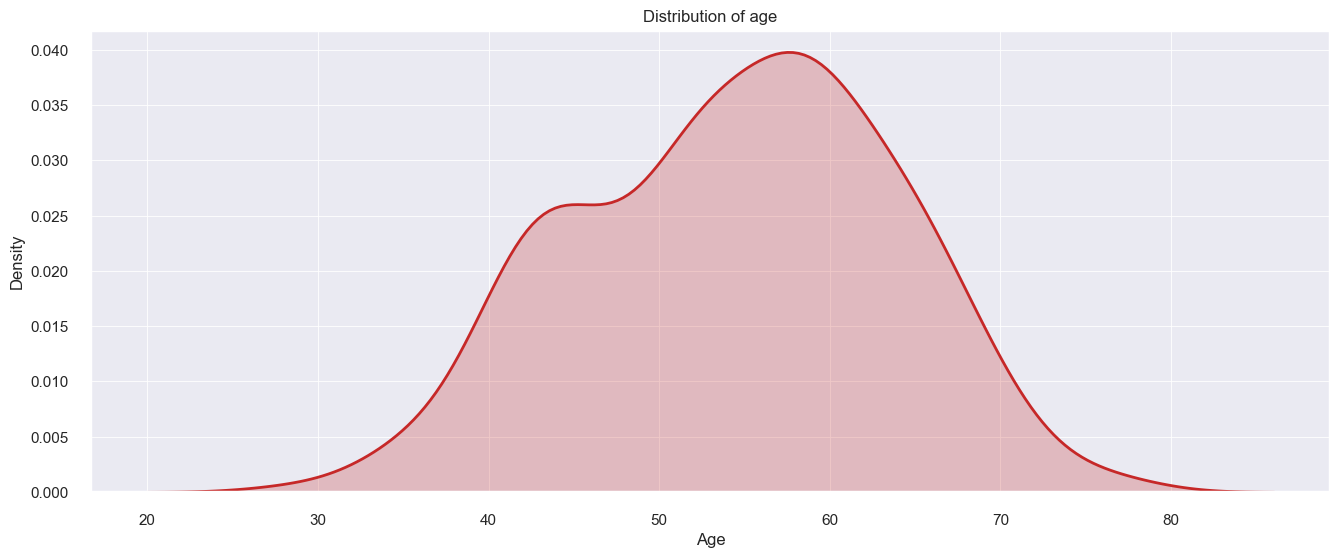

In [567]:
plt.figure(figsize = (16, 6))
plt.title("Distribution of age")
sns.kdeplot(data = df['Age'], fill = True)
plt.show()

The plot showed that the age is normally distributed so we will use the mean to replace null values in age column

In [568]:
#replacing nulls in age column by mean
mean_value=df['Age'].mean()
df['Age'].fillna(value=mean_value, inplace=True)

In [569]:
#replacing nulls in Gender, work_type, smoking_status columns by their mode because they are categorical data
df['Gender'].fillna(value=df['Gender'].mode()[0], inplace=True)
df['work_type'].fillna(value=df['work_type'].mode()[0], inplace=True)
df['smoking_status'].fillna(value=df['smoking_status'].mode()[0], inplace=True)

C:\Users\Jonat\AppData\Local\Temp\ipykernel_9840\1003046216.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



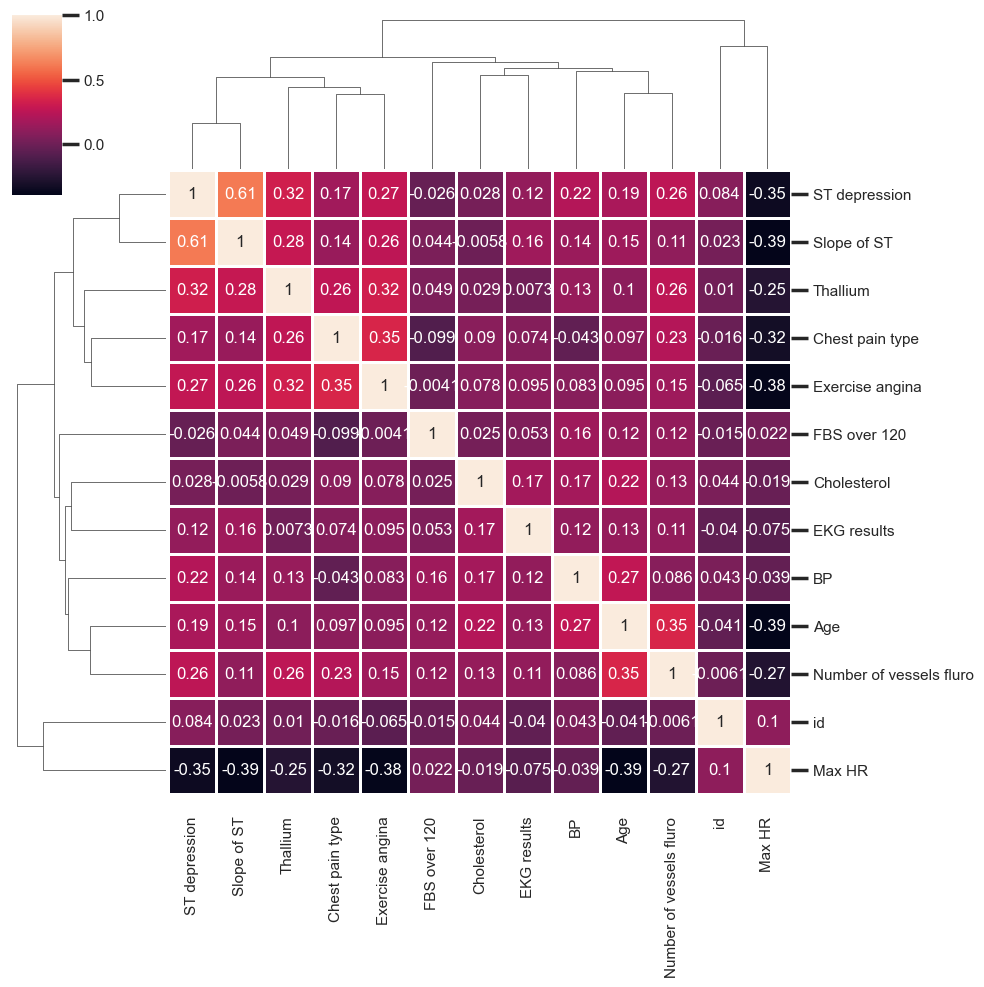

In [570]:
sns.clustermap(df.corr(),lw = 1, annot = True)
plt.show()

In [571]:
df.describe().T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      270 non-null    float64
 2   Gender                   270 non-null    object 
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

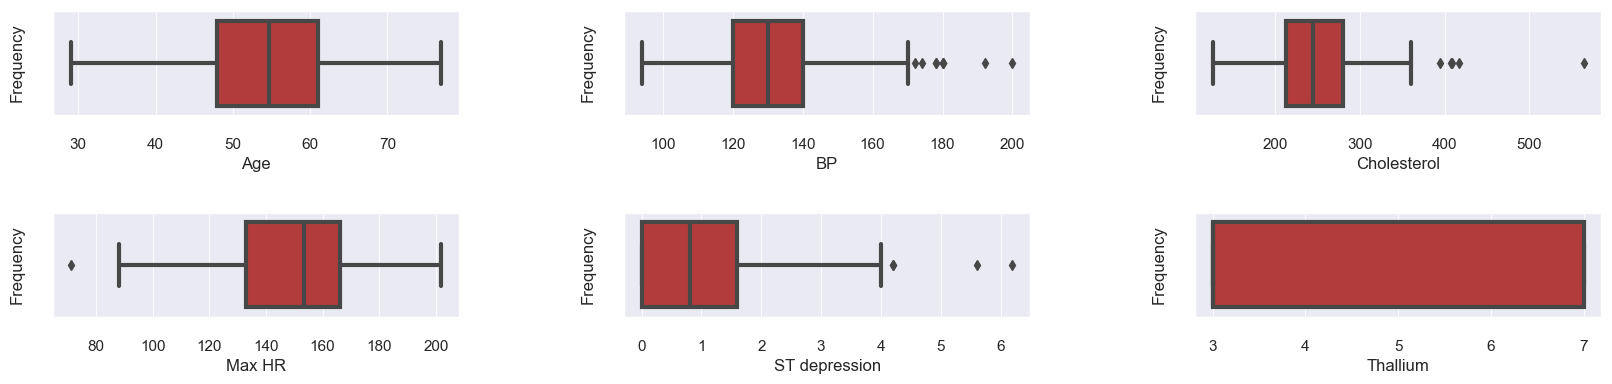

In [572]:
nrows = 2
ncols = 3

# choosing continuous data
continuous_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression','Thallium']
continuous_df = df[continuous_columns]

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4))
axes = axes.flatten()

for i, col in enumerate(continuous_df):
    sns.boxplot(data=continuous_df, x=col, ax=axes[i])
    axes[i].set_ylabel('Frequency')
for i in range(len(continuous_df.columns), nrows * ncols):
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.9)
plt.show()


In [573]:
categorical_columns = ['Gender','work_type','smoking_status','Heart Disease','Chest pain type','FBS over 120','EKG results','Number of vessels fluro']
cols = list(df.drop(categorical_columns, axis=1).columns)

for col in cols:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')

Number of outliers in id: 0
Number of outliers in Age: 0
Number of outliers in BP: 9
Number of outliers in Cholesterol: 5
Number of outliers in Max HR: 1
Number of outliers in Exercise angina: 0
Number of outliers in ST depression: 4
Number of outliers in Slope of ST: 0
Number of outliers in Thallium: 0


In [574]:
df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,2,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,3,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,4,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,5,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No


In [575]:
# function to replace outliers with the max value possible without missing the data 🙂
outliers_columns = ['BP','Cholesterol','Max HR','ST depression']

def outliers(dataset,col):
  Q1 = dataset[col].quantile(0.25)
  Q3 = dataset[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  for i in range(len(dataset)):
      if dataset[col].iloc[i] > upper_bound:
          dataset[col].iloc[i] = upper_bound
      if dataset[col].iloc[i] < lower_bound:
          dataset[col].iloc[i] = lower_bound
#replacing the outliers using the function (On trying we saw that replacing the outliers of these features gives us the best accuracy for us)
for col in outliers_columns:
    outliers(df,col)

C:\Users\Jonat\AppData\Local\Temp\ipykernel_9840\3398224445.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jonat\AppData\Local\Temp\ipykernel_9840\3398224445.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jonat\AppData\Local\Temp\ipykernel_9840\3398224445.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jonat\AppData\Local\Temp\ipykernel_9840\3398224445.py:13: SettingWithCopyWarning:


A value

In [576]:
continuous_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression','Thallium']
continuous_df = df[continuous_columns]

In [577]:
continuous_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression','Thallium']
continuous_df = df[continuous_columns]

from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=10)
var_thres.fit(continuous_df)
print(var_thres.get_support())

constant_columns = [column for column in continuous_df.columns
                    if column not in continuous_df.columns[var_thres.get_support()]]
# df.drop(columns=['ST depression','Thallium','id'],inplace=True)                    

[ True  True  True  True False False]


## Feature selection

In [578]:
#changing data type of Gender, work_type, smoking_status and Heart Disease columns by encoding
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.

columns_encoder = ['Gender','work_type','smoking_status','Heart Disease']
for col in columns_encoder:
    df[col]= label_encoder.fit_transform(df[col])
# df["Heart Disease"]= np.where(df["Heart Disease"]=="No",0,1)
df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,0,4,130,322.0,0,2,109.0,0,2.4,2,3,3,2,1,1
1,2,67.0,1,3,115,380.5,0,2,160.0,0,1.6,2,0,7,3,2,0
2,3,57.0,0,2,124,261.0,0,0,141.0,0,0.3,1,0,7,2,2,1
3,4,64.0,0,4,128,263.0,0,0,105.0,1,0.2,2,1,7,2,3,0
4,5,74.0,1,2,120,269.0,0,2,121.0,1,0.2,1,1,3,3,2,0


In [579]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [580]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

## Feature selection

## chi-squared

In [581]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# instantiate the selector with chi-squared
selector = SelectKBest(chi2, k=3)

# fit the selector on the training set and transform it
X_train_selected = selector.fit_transform(X_train, y_train)

# print the selected feature indices
print("Selected feature indices:", selector.get_support(indices=True))

Selected feature indices: [ 4  7 11]


## lasso regression

In [582]:
from sklearn.linear_model import Lasso

# instantiate the Lasso model with alpha value
lasso_model = Lasso(alpha=0.05)

# fit the Lasso model on the training set
lasso_model.fit(X_train, y_train)

# print the coefficients of the features
print("Feature coefficients:", lasso_model.coef_)

# print the selected feature indices
selected_features = lasso_model.coef_ != 0
print("Selected feature indices:", selected_features)


Feature coefficients: [-0.00202403 -0.          0.06776932  0.00256056  0.00095183 -0.
  0.00609524 -0.00606073  0.          0.0107923   0.          0.08511094
  0.08049895 -0.          0.        ]
Selected feature indices: [ True False  True  True  True False  True  True False  True False  True
  True False False]


In [583]:
df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,0,4,130,322.0,0,2,109.0,0,2.4,2,3,3,2,1,1
1,2,67.0,1,3,115,380.5,0,2,160.0,0,1.6,2,0,7,3,2,0
2,3,57.0,0,2,124,261.0,0,0,141.0,0,0.3,1,0,7,2,2,1
3,4,64.0,0,4,128,263.0,0,0,105.0,1,0.2,2,1,7,2,3,0
4,5,74.0,1,2,120,269.0,0,2,121.0,1,0.2,1,1,3,3,2,0


## information gain

In [584]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# instantiate the selector with mutual information
selector = SelectKBest(mutual_info_classif, k=3)

# fit the selector on the training set and transform it
X_train_selected = selector.fit_transform(X_train, y_train)

# print the selected feature indices
print("Selected feature indices:", selector.get_support(indices=True))

Selected feature indices: [ 2  8 12]


## annova

In [585]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# instantiate the selector with ANOVA F-test
selector = SelectKBest(f_classif, k=3)

# fit the selector on the training set and transform it
X_train_selected = selector.fit_transform(X_train, y_train)

# print the selected feature indices
print("Selected feature indices:", selector.get_support(indices=True))

Selected feature indices: [ 7 11 12]


In [586]:
df.drop(columns = ['Exercise angina','Number of vessels fluro','Thallium'])

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,ST depression,Slope of ST,work_type,smoking_status,Heart Disease
0,1,70.0,0,4,130,322.0,0,2,109.0,2.4,2,2,1,1
1,2,67.0,1,3,115,380.5,0,2,160.0,1.6,2,3,2,0
2,3,57.0,0,2,124,261.0,0,0,141.0,0.3,1,2,2,1
3,4,64.0,0,4,128,263.0,0,0,105.0,0.2,2,2,3,0
4,5,74.0,1,2,120,269.0,0,2,121.0,0.2,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,266,52.0,0,3,170,199.0,1,0,162.0,0.5,1,2,3,0
266,267,44.0,0,2,120,263.0,0,0,173.0,0.0,1,2,2,0
267,268,56.0,1,2,140,294.0,0,2,153.0,1.3,2,0,3,0
268,269,57.0,0,4,140,192.0,0,0,148.0,0.4,2,3,3,0


# **Data Analysis**

## Numeric Analyis

We need to divide the dataset into numeric and categorical datasets


In [587]:
# Create a new column with age ranges
df['Age Range'] = np.where(df['Age'] >= 55, '>55', '<55')

In [588]:
df['Heart Disease']=df['Heart Disease'].replace({'Yes': 1, 'No': 0})
df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease,Age Range
0,1,70.0,0,4,130,322.0,0,2,109.0,0,2.4,2,3,3,2,1,1,>55
1,2,67.0,1,3,115,380.5,0,2,160.0,0,1.6,2,0,7,3,2,0,>55
2,3,57.0,0,2,124,261.0,0,0,141.0,0,0.3,1,0,7,2,2,1,>55
3,4,64.0,0,4,128,263.0,0,0,105.0,1,0.2,2,1,7,2,3,0,>55
4,5,74.0,1,2,120,269.0,0,2,121.0,1,0.2,1,1,3,3,2,0,>55


In [589]:
columns = df.columns

In [590]:
numeric_columns = ['Age','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium','Heart Disease']
categorical_columns = ['Gender','work_type','smoking_status','Age Range']

# Dividing into numeric dataset and categorical dataset
numeric_df = df[numeric_columns]
categorical_df =df[categorical_columns]

In [591]:
numeric_df.describe()

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.424242,3.174074,130.959259,248.590741,0.148148,1.022222,149.724074,0.329630,1.034444,1.585185,0.670370,4.696296,0.444444
std,9.080492,0.950090,16.798450,47.468245,0.355906,0.997891,23.019928,0.470952,1.091484,0.614390,0.943896,1.940659,0.497827
min,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,83.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.712121,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,4.000000,170.000000,380.500000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000,1.000000


In [592]:
categorical_df.describe()

,Gender,work_type,smoking_status
count,270.000000,270.000000,270.000000
mean,0.314815,2.025926,1.522222
std,0.465305,0.876836,0.981931
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000
50%,0.000000,2.000000,2.000000
75%,1.000000,3.000000,2.000000
max,1.000000,4.000000,3.000000


In [593]:
Negative_df = df.loc[df["Heart Disease"]==0,:]
Positive_df = df.loc[df["Heart Disease"]==1,:]

In [594]:
Negative_df.describe()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0
mean,135.780000,52.771313,0.433333,2.820000,128.733333,242.656667,0.153333,0.860000,158.333333,0.153333,0.621333,1.400000,0.286667,3.786667,1.986667,1.473333,0.0
std,78.870284,9.499654,0.497196,0.927362,16.083117,47.458570,0.361516,0.990085,19.283357,0.361516,0.795000,0.590757,0.648557,1.556914,0.882238,0.967226,0.0
min,2.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.0
25%,67.500000,45.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,148.250000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,1.000000,0.0
50%,138.000000,52.500000,0.000000,3.000000,130.000000,236.000000,0.000000,0.000000,161.000000,0.000000,0.200000,1.000000,0.000000,3.000000,2.000000,2.000000,0.0
75%,204.750000,59.000000,1.000000,3.750000,140.000000,268.750000,0.000000,2.000000,172.000000,0.000000,1.175000,2.000000,0.000000,3.000000,2.000000,2.000000,0.0
max,269.000000,76.000000,1.000000,4.000000,170.000000,380.500000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000,4.000000,3.000000,0.0


In [595]:
Positive_df.describe()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0
mean,135.150000,56.490404,0.166667,3.616667,133.741667,256.008333,0.141667,1.22500,138.962500,0.55000,1.550833,1.816667,1.150000,5.833333,2.075000,1.583333,1.0
std,77.424037,8.102342,0.374241,0.779823,17.319293,46.620269,0.350170,0.97414,22.848989,0.49958,1.190650,0.564843,1.034286,1.769648,0.871225,1.000700,0.0
min,1.000000,35.000000,0.000000,1.000000,100.000000,149.000000,0.000000,0.00000,83.500000,0.00000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.0
25%,69.500000,52.000000,0.000000,4.000000,120.000000,227.250000,0.000000,0.00000,124.750000,0.00000,0.600000,1.000000,0.000000,3.000000,2.000000,1.000000,1.0
50%,131.500000,58.000000,0.000000,4.000000,130.000000,255.500000,0.000000,2.00000,141.500000,1.00000,1.400000,2.000000,1.000000,7.000000,2.000000,2.000000,1.0
75%,202.250000,62.000000,0.000000,4.000000,145.000000,286.500000,0.000000,2.00000,157.250000,1.00000,2.425000,2.000000,2.000000,7.000000,3.000000,2.000000,1.0
max,270.000000,77.000000,1.000000,4.000000,170.000000,380.500000,1.000000,2.00000,195.000000,1.00000,4.000000,3.000000,3.000000,7.000000,4.000000,3.000000,1.0


In [596]:
df.groupby('Gender').mean()

C:\Users\Jonat\AppData\Local\Temp\ipykernel_9840\3774296011.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
Gender,,,,,,,,,,,,,,,,
0,137.324324,53.958231,3.200000,130.275676,242.643243,0.156757,1.059459,148.408108,0.383784,1.111892,1.605405,0.724324,5.194595,2.021622,1.529730,0.540541
1,131.529412,55.438503,3.117647,132.447059,261.535294,0.129412,0.941176,152.588235,0.211765,0.865882,1.541176,0.552941,3.611765,2.035294,1.505882,0.235294


In [597]:
df.pivot_table(index='Age Range', aggfunc='mean',columns = 'Chest pain type')["Heart Disease"].style.bar(subset=[1],vmin=0,vmax=1,color="#D65F5F")\
    .bar(subset=[2],vmin=0,vmax=1,color="#D84535").bar(subset=[3],vmin=0,vmax=1,color="#BF2717").bar(subset=[4],vmin=0,vmax=1,color="#981508")

Chest pain type,1,2,3,4
Age Range,,,,
<55,0.125000,0.074074,0.127660,0.622642
>55,0.333333,0.333333,0.343750,0.763158


## Graphic Analyis

In [598]:
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
colors=["#80002D","#4C70F6","#8A897C","#59D2FE","#D7B49E"]
colors2=["#80002D","#0B3FEA"]

### Univariate Analysis

In [599]:
df.drop(columns="id",inplace=True)

In [600]:
my_palette = sns.color_palette(["#C62828","#1565C0","#8A897C","#59D2FE","#D7B49E"])

sns.set_palette(my_palette)

In [601]:
def histplot(x, color = "Heart Disease",height=500, width=600,font_size=13,color_sequence=["#C62828", "#1565C0"], text_auto=True, bins=40):
    fig = px.histogram(df, x=x, color="Heart Disease", color_discrete_sequence=color_sequence, text_auto=text_auto, nbins=bins)
    fig.update_layout(barmode='group', title=x, font=dict(size=font_size), legend=dict(title='Heart Disease Status'),height=height, width=width, template = 'plotly_dark')
    
    fig.update_traces(name='No', selector=dict(name='0'))
    fig.update_traces(name='Yes', selector=dict(name='1'))
    fig.show()

In [602]:
import plotly.graph_objs as go

labels = ['No', 'Yes']
values = df['Heart Disease'].value_counts().values.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=["#1565C0","#C62828"], line=dict(color='#000000', width=2)))
fig.update_layout(title='Heart Disease', font=dict(size=20), legend=dict(title=''),height=400, width=400, template = 'plotly_dark')
fig.show()


# Divariate Analysis

## Age

Age is a major risk factor for heart disease due to the narrowing and decreased flexibility of arteries. Other risk factors such as high blood pressure, high cholesterol, and diabetes are also more common in older adults.

In [603]:
histplot("Age", width=1200, text_auto=False)

## Gender

In [604]:
histplot("Gender")

In [605]:
histplot("Chest pain type", bins=4)

High blood pressure (hypertension) is a significant risk factor for heart disease. Over time, high blood pressure can damage the arteries and increase the workload on the heart, leading to an increased risk of heart disease, heart attack, and stroke. Lowering blood pressure through lifestyle changes and/or medication can help reduce the risk of heart disease.

In [606]:
histplot("BP", width=1200, text_auto=False)

Cholesterol can build up in the arteries, leading to atherosclerosis and increasing the risk of heart disease.

In [607]:
histplot("Cholesterol", width=1200, text_auto=False)

Fasting blood sugar levels over 120 mg/dL are a risk factor for heart disease. High blood sugar levels can damage blood vessels and nerves, increasing the risk of heart disease.

In [608]:
histplot("FBS over 120",bins=2)

EKG (Electrocardiogram) is a test that measures electrical activity of the heart. Abnormal results can indicate heart disease.

In [609]:
histplot("EKG results",bins=3)

Exercise-induced angina is chest pain or discomfort that occurs during physical activity in individuals with heart disease. It is caused by reduced blood flow to the heart muscle due to narrowed or blocked arteries.

In [610]:
histplot("Exercise angina",bins=2)

ST depression is a type of abnormal ECG finding where the ST segment of the heart's electrical activity appears lowered. It is often associated with coronary artery disease and other heart conditions.

In [611]:
histplot("ST depression", width=1200, text_auto=False,bins=12)

Slope of ST refers to the upward or downward movement of the ST segment on an electrocardiogram. A deviation from the normal slope could indicate the presence of heart disease.

In [612]:
histplot("Slope of ST",bins=3)

The number of vessels visible under a fluro imaging test may indicate the presence of heart disease. The more vessels that are blocked or narrowed, the higher the risk of heart disease.

In [613]:
histplot("Number of vessels fluro",bins=4)

Thallium is a radioactive substance used in medical imaging tests to evaluate blood flow to the heart muscle. Thallium stress tests can help diagnose coronary artery disease, a type of heart disease caused by narrowed or blocked arteries

In [614]:
histplot("Thallium",bins=6,text_auto=False)

Smoking is a significant risk factor for heart disease. It damages blood vessels, increases plaque buildup, and reduces blood flow to the heart, leading to an increased risk of heart disease, heart attack, and stroke.

In [615]:
histplot("smoking_status",bins=4)

The relationship between work type and heart disease is complex and can depend on various factors such as physical activity, stress, and environmental exposure. Jobs involving high physical activity may reduce the risk of heart disease, while sedentary jobs and those with high stress or environmental toxins may increase the risk.

In [616]:
histplot("work_type",bins=5)

### Multivariate Analysis

In [625]:
df_male=df.loc[df["Gender"]==1,:]
df_female=df.loc[df["Gender"]==0,:]

Age_disease_male=pd.crosstab(df_male["Age"],df_male["Heart Disease"])*100/85
Age_disease_female=pd.crosstab(df_female["Age"],df_female["Heart Disease"])*100/185

In [626]:
df

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease,Age Range
0,70.0,0,4,130,322.0,0,2,109.0,0,2.4,2,3,3,2,1,1,>55
1,67.0,1,3,115,380.5,0,2,160.0,0,1.6,2,0,7,3,2,0,>55
2,57.0,0,2,124,261.0,0,0,141.0,0,0.3,1,0,7,2,2,1,>55
3,64.0,0,4,128,263.0,0,0,105.0,1,0.2,2,1,7,2,3,0,>55
4,74.0,1,2,120,269.0,0,2,121.0,1,0.2,1,1,3,3,2,0,>55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,0,3,170,199.0,1,0,162.0,0,0.5,1,0,7,2,3,0,<55
266,44.0,0,2,120,263.0,0,0,173.0,0,0.0,1,0,7,2,2,0,<55
267,56.0,1,2,140,294.0,0,2,153.0,0,1.3,2,0,3,0,3,0,>55
268,57.0,0,4,140,192.0,0,0,148.0,0,0.4,2,0,6,3,3,0,>55


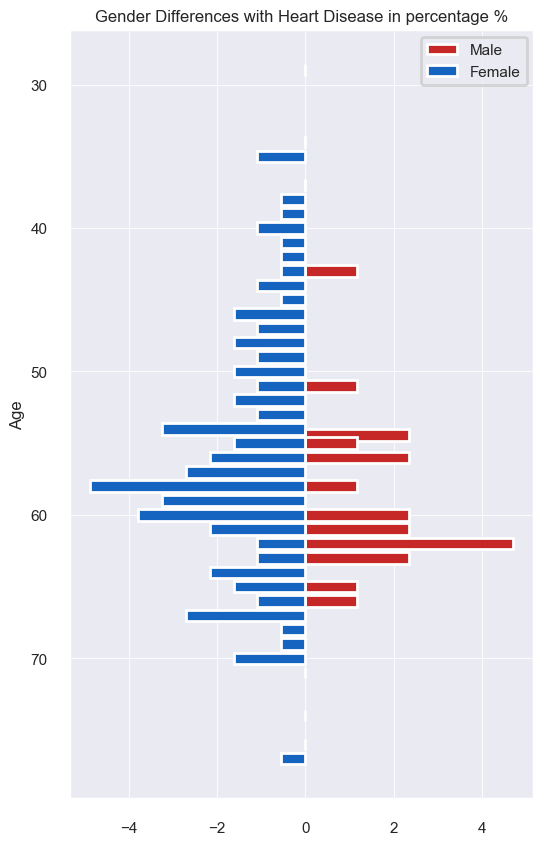

In [627]:
fig = plt.figure(figsize=(6, 10))

plt.barh(Age_disease_male.index, Age_disease_male.iloc[:,1], color='#C62828',label='Male')
plt.barh(Age_disease_female.index, Age_disease_female.iloc[:,1] * -1, color='#1565C0',label='Female')
plt.title("Gender Differences with Heart Disease in percentage %")
plt.ylabel("Age")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

Smoking can increase "bad" cholesterol (LDL) and decrease "good" cholesterol (HDL), which can lead to the buildup of plaque in the arteries and increase the risk of heart disease.

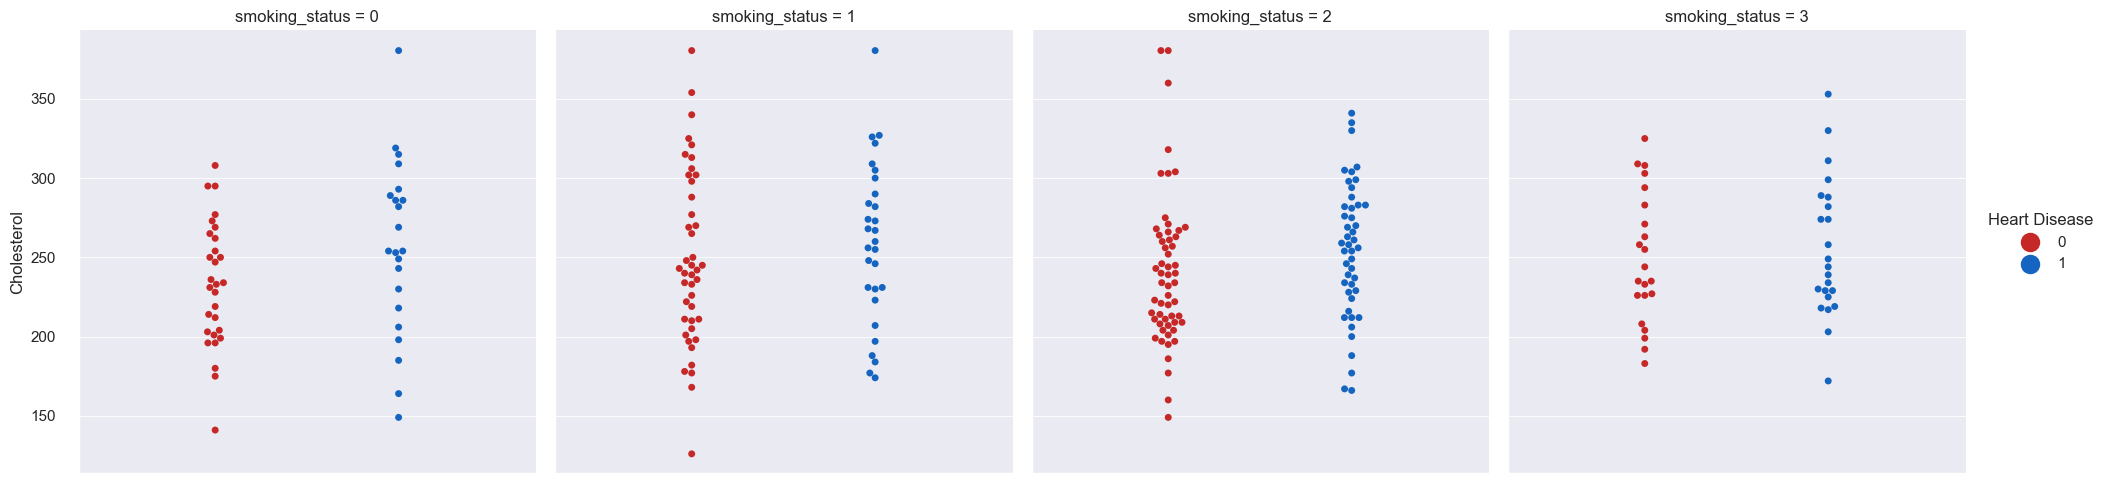

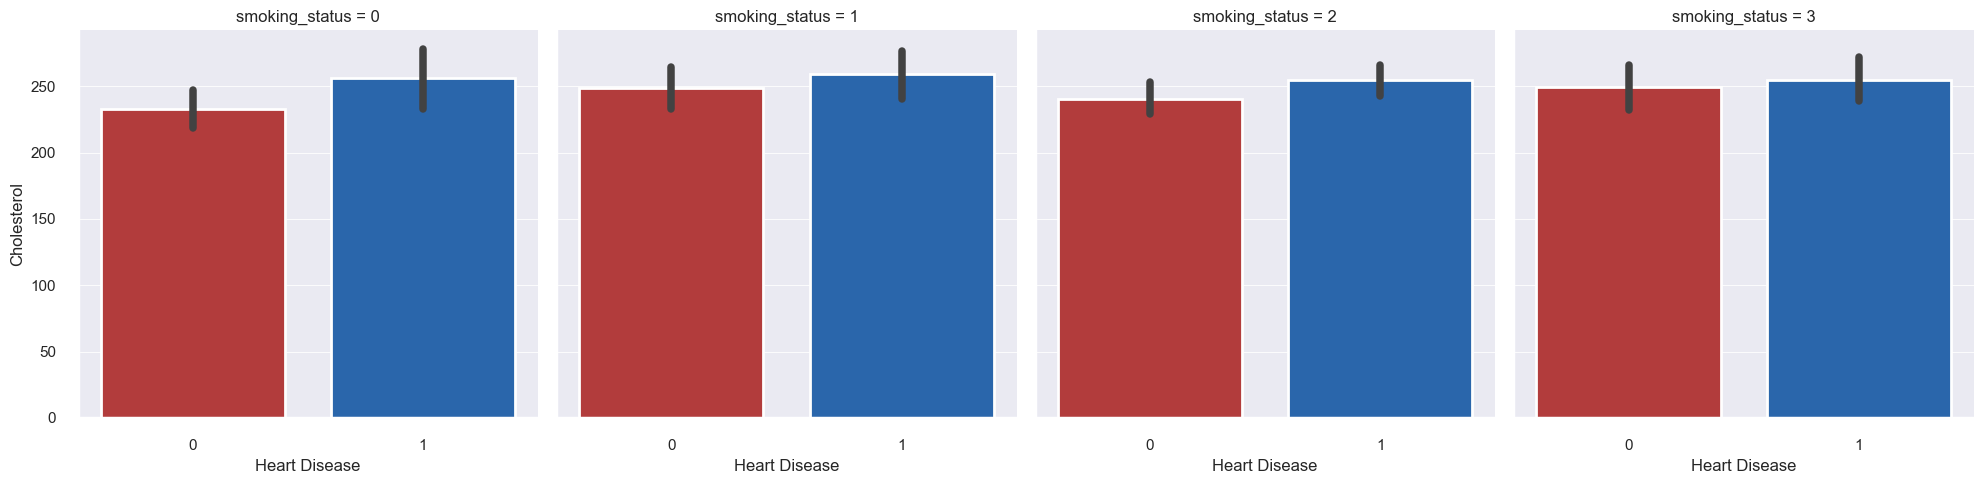

In [628]:
sns.catplot(data = df, y="Cholesterol",hue="Heart Disease",col="smoking_status",kind="swarm", dodge=True)
sns.catplot(data = df, y="Cholesterol",x="Heart Disease",col="smoking_status",kind="bar")

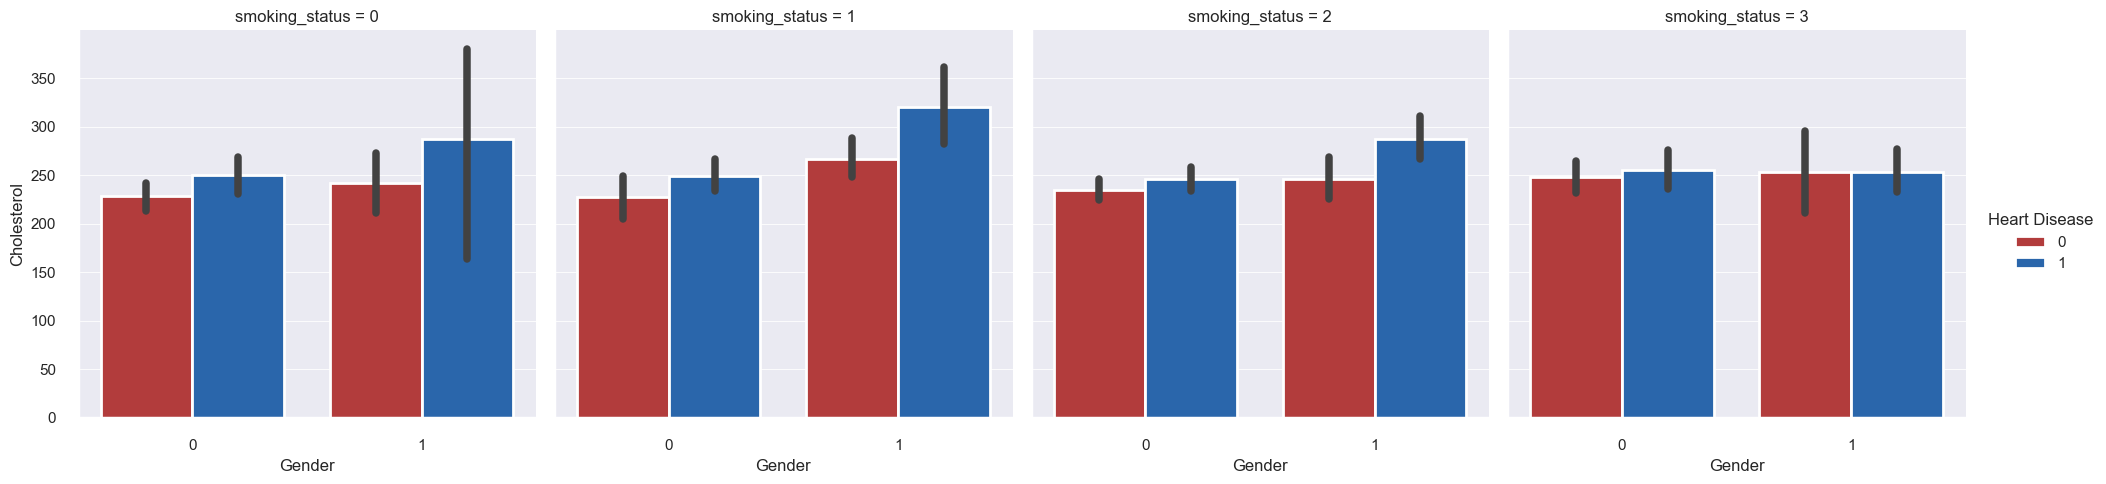

In [629]:
sns.catplot(data = df, x="Gender",hue="Heart Disease",col="smoking_status",kind="bar", y="Cholesterol")

In [630]:
continuous_columns

['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Thallium']

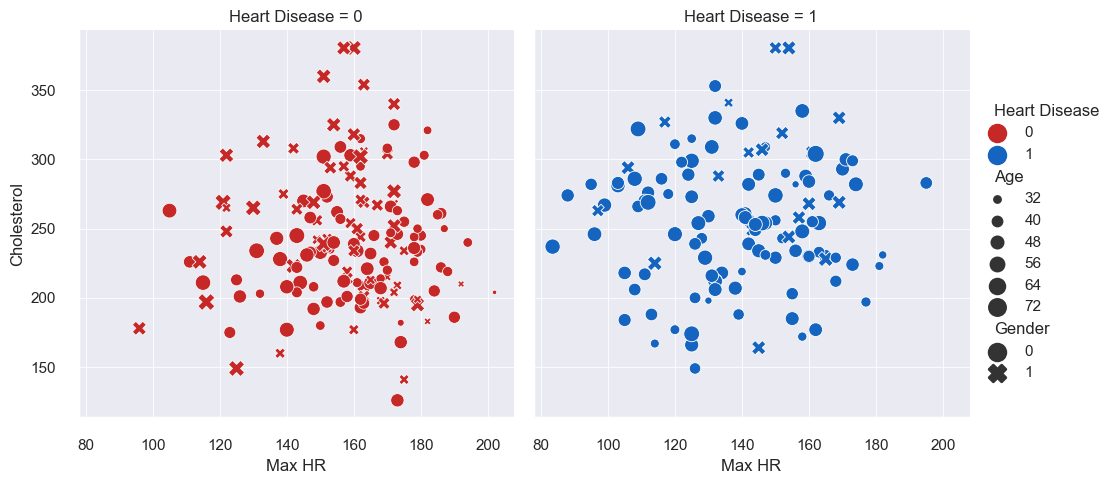

In [631]:
sns.relplot(data=df, x="Max HR",y='Cholesterol',size='Age',col='Heart Disease',hue='Heart Disease', sizes=(10, 150),style='Gender')

In [632]:
df.drop(columns="Age Range",inplace=True)

In [633]:
df.head()

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,70.0,0,4,130,322.0,0,2,109.0,0,2.4,2,3,3,2,1,1
1,67.0,1,3,115,380.5,0,2,160.0,0,1.6,2,0,7,3,2,0
2,57.0,0,2,124,261.0,0,0,141.0,0,0.3,1,0,7,2,2,1
3,64.0,0,4,128,263.0,0,0,105.0,1,0.2,2,1,7,2,3,0
4,74.0,1,2,120,269.0,0,2,121.0,1,0.2,1,1,3,3,2,0


In [655]:
#splitting the data to x(features) and y(column we want to predict) 
X=df.drop(['Heart Disease'] ,axis=1)
y=df['Heart Disease']

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from statistics import mean, stdev

def logistic_regression(param_grid, df_X, df_Y):
    print("First, using standardization:")
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(df_X)
    logreg = LogisticRegression()
    grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_scaled, df_Y)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best accuracy score: {grid_search.best_score_}")
    print("Minimum accuracy:", min(grid_search.cv_results_['mean_test_score']) * 100, "%")
    print("Overall accuracy:", grid_search.cv_results_['mean_test_score'].mean() * 100, "%")
    print("Standard Deviation is:", grid_search.cv_results_['std_test_score'])

    print("\nSecond, using normalization:")
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(df_X)
    logreg = LogisticRegression()
    grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')
    grid_search.fit(x_scaled, df_Y)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best accuracy score: {grid_search.best_score_}")
    print("Minimum accuracy:", min(grid_search.cv_results_['mean_test_score']) * 100, "%")
    print("Overall accuracy:", grid_search.cv_results_['mean_test_score'].mean() * 100, "%")
    print("Standard Deviation is:", grid_search.cv_results_['std_test_score'])


In [635]:
# #Normlize the data
# # Create a StandardScaler object
# scaler = StandardScaler()

#  #Fit and transform the data
# normalized_data = scaler.fit_transform(X)

#  #Create a new dataframe from the normalized data
# X = pd.DataFrame(normalized_data, columns=X.columns)
# X.head(15)

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status
0,1.718484,-0.677834,0.870928,-0.057210,1.549364,-0.417029,0.981664,-1.772364,-0.701222,1.253423,0.676419,2.472682,-0.875706,-0.029622,-0.532820
1,1.387492,1.475287,-0.183559,-0.951808,2.784055,-0.417029,0.981664,0.447222,-0.701222,0.519115,0.676419,-0.711535,1.189277,1.112959,0.487473
2,0.284185,-0.677834,-1.238045,-0.415049,0.261908,-0.417029,-1.026285,-0.379683,-0.701222,-0.674136,-0.954234,-0.711535,1.189277,-0.029622,0.487473
3,1.056500,-0.677834,0.870928,-0.176490,0.304119,-0.417029,-1.026285,-1.946450,1.426081,-0.765924,0.676419,0.349871,1.189277,-0.029622,1.507766
4,2.159807,1.475287,-1.238045,-0.653609,0.430754,-0.417029,0.981664,-1.250109,1.426081,-0.765924,-0.954234,0.349871,-0.875706,1.112959,0.487473
5,1.166831,-0.677834,0.870928,-0.653609,-1.510982,-0.417029,-1.026285,-0.423204,-0.701222,-0.582347,-0.954234,-0.711535,1.189277,-0.029622,-0.532820
6,0.173854,-0.677834,-0.183559,-0.057210,0.156379,2.397916,0.981664,-0.336162,1.426081,-0.398770,0.676419,0.349871,0.673032,-0.029622,0.487473
7,0.504847,-0.677834,0.870928,-1.250007,-0.202421,-0.417029,0.981664,-0.336162,1.426081,0.151961,0.676419,0.349871,1.189277,-0.029622,0.487473
8,0.615177,-0.677834,0.870928,0.539188,0.937295,-0.417029,0.981664,0.882435,-0.701222,0.151961,0.676419,1.411276,1.189277,-0.029622,-1.553112
9,0.946169,1.475287,0.870928,1.135587,2.784055,-0.417029,0.981664,0.186094,-0.701222,2.722040,0.676419,2.472682,1.189277,-0.029622,-1.553112


In [636]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [657]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100,1000],
    'n_jobs': [1,2,3]
}

print("First, using standardization:")
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_scaled, y)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_}")
print("Minimum accuracy:", min(grid_search.cv_results_['mean_test_score']) * 100, "%")
print("Overall accuracy:", grid_search.cv_results_['mean_test_score'].mean() * 100, "%")
print("Standard Deviation is:", grid_search.cv_results_['std_test_score'])

print("\nSecond, using normalization:")
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_scaled, y)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_}")
print("Minimum accuracy:", min(grid_search.cv_results_['mean_test_score']) * 100, "%")
print("Overall accuracy:", grid_search.cv_results_['mean_test_score'].mean() * 100, "%")
print("Standard Deviation is:", grid_search.cv_results_['std_test_score'])

First, using standardization:


In [653]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100,1000],
    'n_jobs': [1,2,3]
}

# Create a logistic regression object
logreg = LogisticRegression(random_state=41)

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Print the best parameters and the corresponding accuracy score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_}")


Best parameters: {'C': 10, 'max_iter': 100, 'n_jobs': 1, 'penalty': 'l2'}
Best accuracy score: 0.8659756097560976


c:\Users\Jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Jonat\AppData\Local\Programs\

In [639]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy score
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 79.41%


In [640]:
df.shape

(270, 16)

Text(0.5, 51.41666666666664, 'Predicted label')

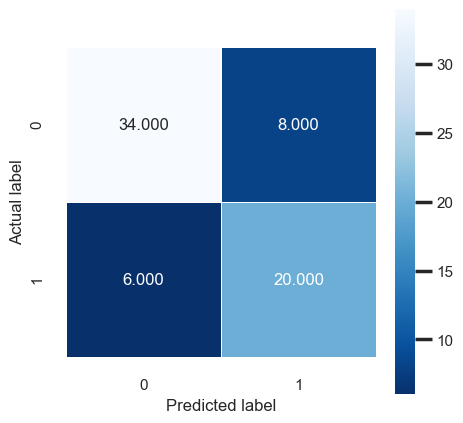

In [641]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
y_score_random = randomFst.predict_proba(x_test_fold)[:, 1]
false_positive_rate_random, true_positive_rate_random, threshold_random = roc_curve(y_test_fold, y_score_random)

In [642]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        42
           1       0.71      0.77      0.74        26

    accuracy                           0.79        68
   macro avg       0.78      0.79      0.79        68
weighted avg       0.80      0.79      0.80        68



In [643]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

0.20588235294117646
0.20588235294117646


Accuracy: 0.7941176470588235
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.73      0.73      0.73        26

    accuracy                           0.79        68
   macro avg       0.78      0.78      0.78        68
weighted avg       0.79      0.79      0.79        68

0.20588235294117646
0.20588235294117646


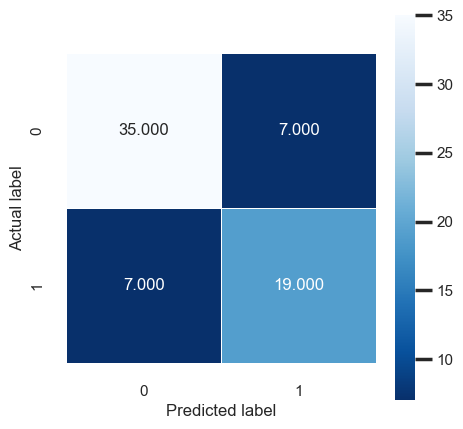

In [644]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='sigmoid') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
cr=classification_report(y_test, y_pred)
print(cr)
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

Accuracy: 0.7647058823529411
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.68      0.73      0.70        26

    accuracy                           0.76        68
   macro avg       0.75      0.76      0.75        68
weighted avg       0.77      0.76      0.77        68

0.23529411764705882
0.23529411764705882


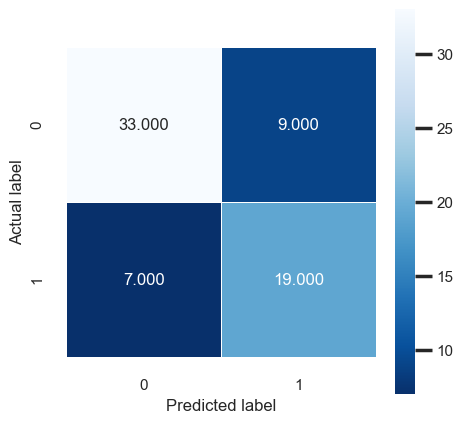

In [645]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state=41)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
cr=classification_report(y_test, y_pred)
print(cr)
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

In [646]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [647]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)

# Train an XGBoost regressor on the selected features
xgb_model = XGBRegressor(n_estimators=500)
xgb_model.fit(X_train_selected, y_train)

# Calculate the accuracy using cross-validation
scores = cross_val_score(xgb_model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
mse = -scores.mean()

print("Mean squared error:", mse)


Mean squared error: 0.17744613673658688


In [648]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Train XGBoost classifier
model = xgb.XGBClassifier(n_estimators=1000,learning_rate=0.05, n_jobs=4)
model.fit(X_train, y_train)

# Predict test set labels
y_pred = model.predict(X_test)

# Calculate accuracy using various metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1 score:", f1)


Accuracy: 0.7647058823529411
AUC: 0.7582417582417582
F1 score: 0.7037037037037038


              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.68      0.73      0.70        26

    accuracy                           0.76        68
   macro avg       0.75      0.76      0.75        68
weighted avg       0.77      0.76      0.77        68

0.23529411764705882
0.23529411764705882


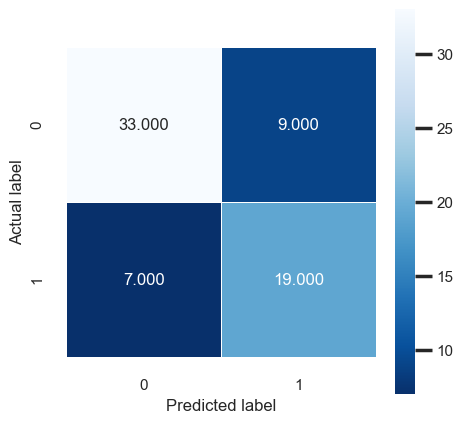

In [649]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
cr=classification_report(y_test, y_pred)
print(cr)
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

In [650]:
from sklearn.ensemble import RandomForestClassifier

randomFst = RandomForestClassifier(max_depth=14, n_estimators=610, n_jobs = -1,max_features=4,random_state=1)
randomFst.fit(X_train, y_train)
randomFst.score(X_test, y_test)
logreg_random = randomFst.predict(X_test)
print(classification_report(y_test ,logreg_random))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.72      0.81      0.76        26

    accuracy                           0.81        68
   macro avg       0.80      0.81      0.80        68
weighted avg       0.82      0.81      0.81        68



              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.68      0.73      0.70        26

    accuracy                           0.76        68
   macro avg       0.75      0.76      0.75        68
weighted avg       0.77      0.76      0.77        68

0.23529411764705882
0.23529411764705882


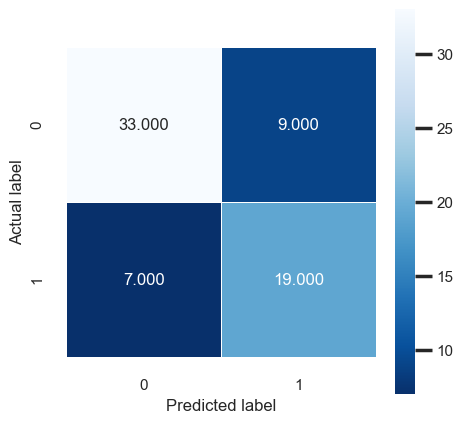

In [651]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
cr=classification_report(y_test, y_pred)
print(cr)
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))